In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
df.shape

(19158, 13)

In [27]:
cols=[var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()>0]

In [28]:
# Cols is Data set 
cols 

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [30]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1180,0.527,Full time course,High School,2.0,9.0
5925,0.920,no_enrollment,Graduate,15.0,62.0
12731,0.920,Full time course,High School,6.0,20.0
1539,0.762,no_enrollment,Graduate,6.0,23.0
12772,0.926,no_enrollment,Masters,9.0,22.0


In [37]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [41]:
# null value or missing value delete. and create new table 
new_df=df[cols].dropna()

df.shape , new_df.shape


((19158, 13), (17182, 5))

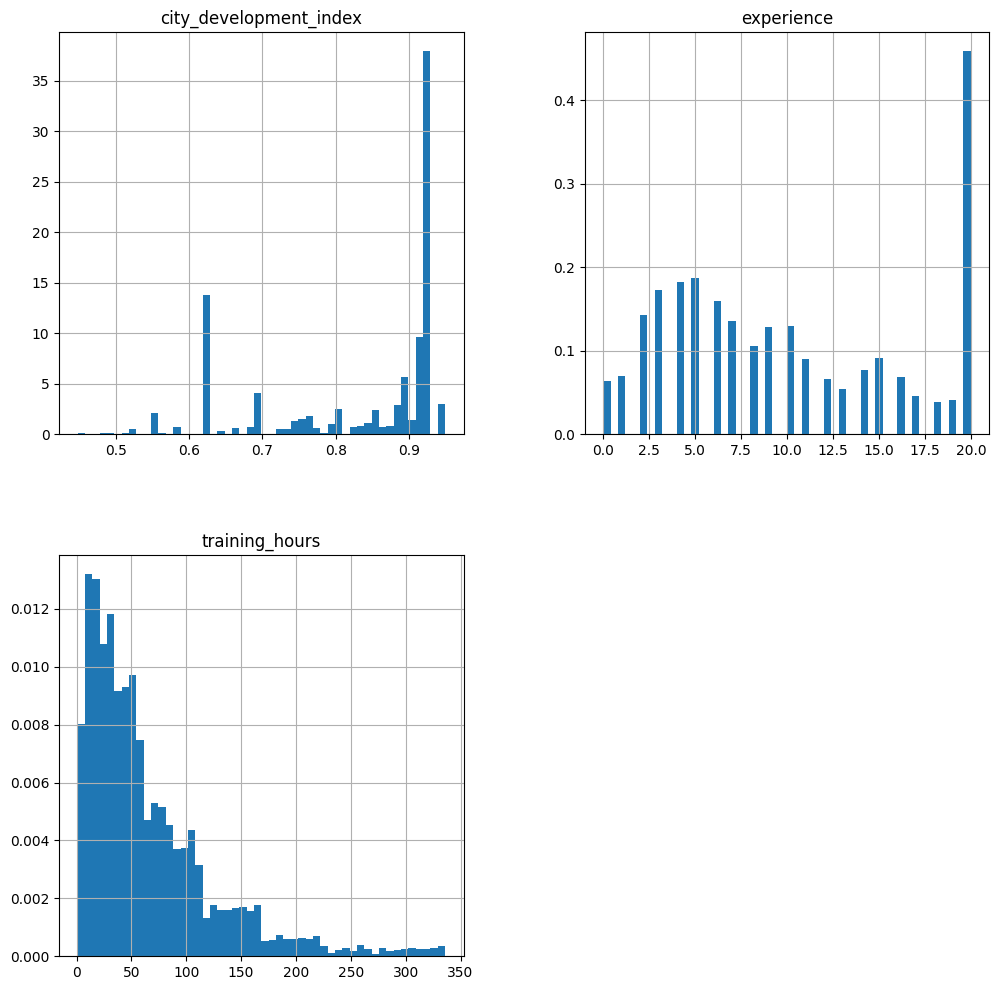

In [42]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: >

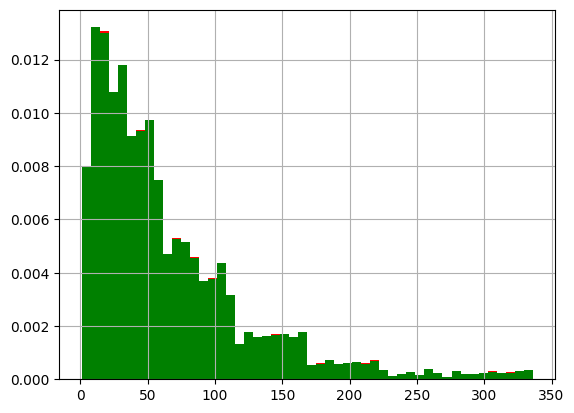

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)


# original value 
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True)



<Axes: ylabel='Density'>

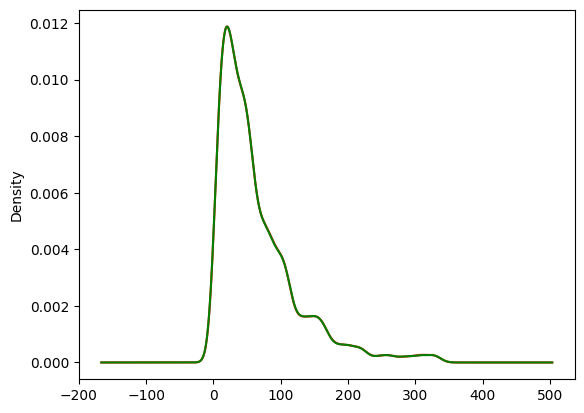

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')